In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the cleaned data
df = pd.read_csv('chem.csv')

# Start your EDA
print(df.head())


            Names  Classwork1  Assignment1  Classwork2  Assignment2  Total40  \
0   Charlie Davis        10.0         10.0        10.0         10.0     40.0   
1     James Lewis        10.0          8.0        10.0         10.0     38.0   
2   Benjamin Diaz        10.0         10.0        10.0         10.0     40.0   
3  Harold Johnson        10.0         10.0        10.0         10.0     40.0   
4    Zachary Bell        10.0         10.0        10.0         10.0     40.0   

   ActualScore1  FirstCA  HalfTermScore  Project  SecondCA  Classwork3  \
0          10.0      6.0           16.0     10.0       8.0         9.0   
1           9.5      6.0           15.5     10.0       5.0         9.0   
2          10.0      5.5           15.5     10.0       5.0         9.0   
3          10.0      6.5           16.5     10.0       8.0        10.0   
4          10.0      7.0           17.0     10.0       7.0        10.0   

   Classwork4  Total20  TotalCA  Exam  GrandTotal Grade  
0         9.0   

### Exploratory Data Analysis (EDA)

       Classwork1  Assignment1  Classwork2  Assignment2    Total40  \
count   37.000000    37.000000   37.000000    37.000000  37.000000   
mean     9.810811     9.405405    9.540541     9.513514  38.270270   
std      0.876795     1.480605    1.069647     1.445714   4.451271   
min      5.000000     2.000000    5.000000     2.000000  14.000000   
25%     10.000000    10.000000   10.000000    10.000000  38.000000   
50%     10.000000    10.000000   10.000000    10.000000  40.000000   
75%     10.000000    10.000000   10.000000    10.000000  40.000000   
max     10.000000    10.000000   10.000000    10.000000  40.000000   

       ActualScore1    FirstCA  HalfTermScore  Project   SecondCA  Classwork3  \
count     37.000000  37.000000      37.000000     37.0  37.000000   37.000000   
mean       9.567568   5.878378      15.445946     10.0   7.081081    9.351351   
std        1.112818   1.101800       1.821110      0.0   2.059913    1.085670   
min        3.500000   3.500000       7.500000

array([[<Axes: title={'center': 'Classwork1'}>,
        <Axes: title={'center': 'Assignment1'}>,
        <Axes: title={'center': 'Classwork2'}>,
        <Axes: title={'center': 'Assignment2'}>],
       [<Axes: title={'center': 'Total40'}>,
        <Axes: title={'center': 'ActualScore1'}>,
        <Axes: title={'center': 'FirstCA'}>,
        <Axes: title={'center': 'HalfTermScore'}>],
       [<Axes: title={'center': 'Project'}>,
        <Axes: title={'center': 'SecondCA'}>,
        <Axes: title={'center': 'Classwork3'}>,
        <Axes: title={'center': 'Classwork4'}>],
       [<Axes: title={'center': 'Total20'}>,
        <Axes: title={'center': 'TotalCA'}>,
        <Axes: title={'center': 'Exam'}>,
        <Axes: title={'center': 'GrandTotal'}>]], dtype=object)

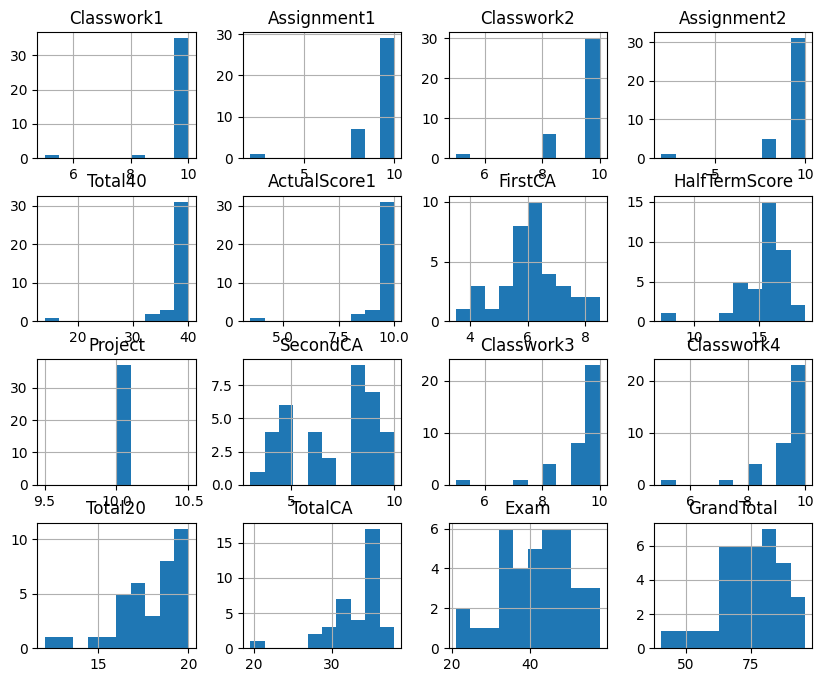

In [62]:
print(df.describe())
df.hist(figsize=(10, 8))


### Check for Missing Values

In [63]:
print(df.isnull().sum())
df = df.dropna()  # or use df.fillna() to fill missing values


Names            0
Classwork1       0
Assignment1      0
Classwork2       0
Assignment2      0
Total40          0
ActualScore1     0
FirstCA          0
HalfTermScore    0
Project          0
SecondCA         0
Classwork3       0
Classwork4       0
Total20          0
TotalCA          0
Exam             0
GrandTotal       0
Grade            0
dtype: int64


### Visualize Relationships:

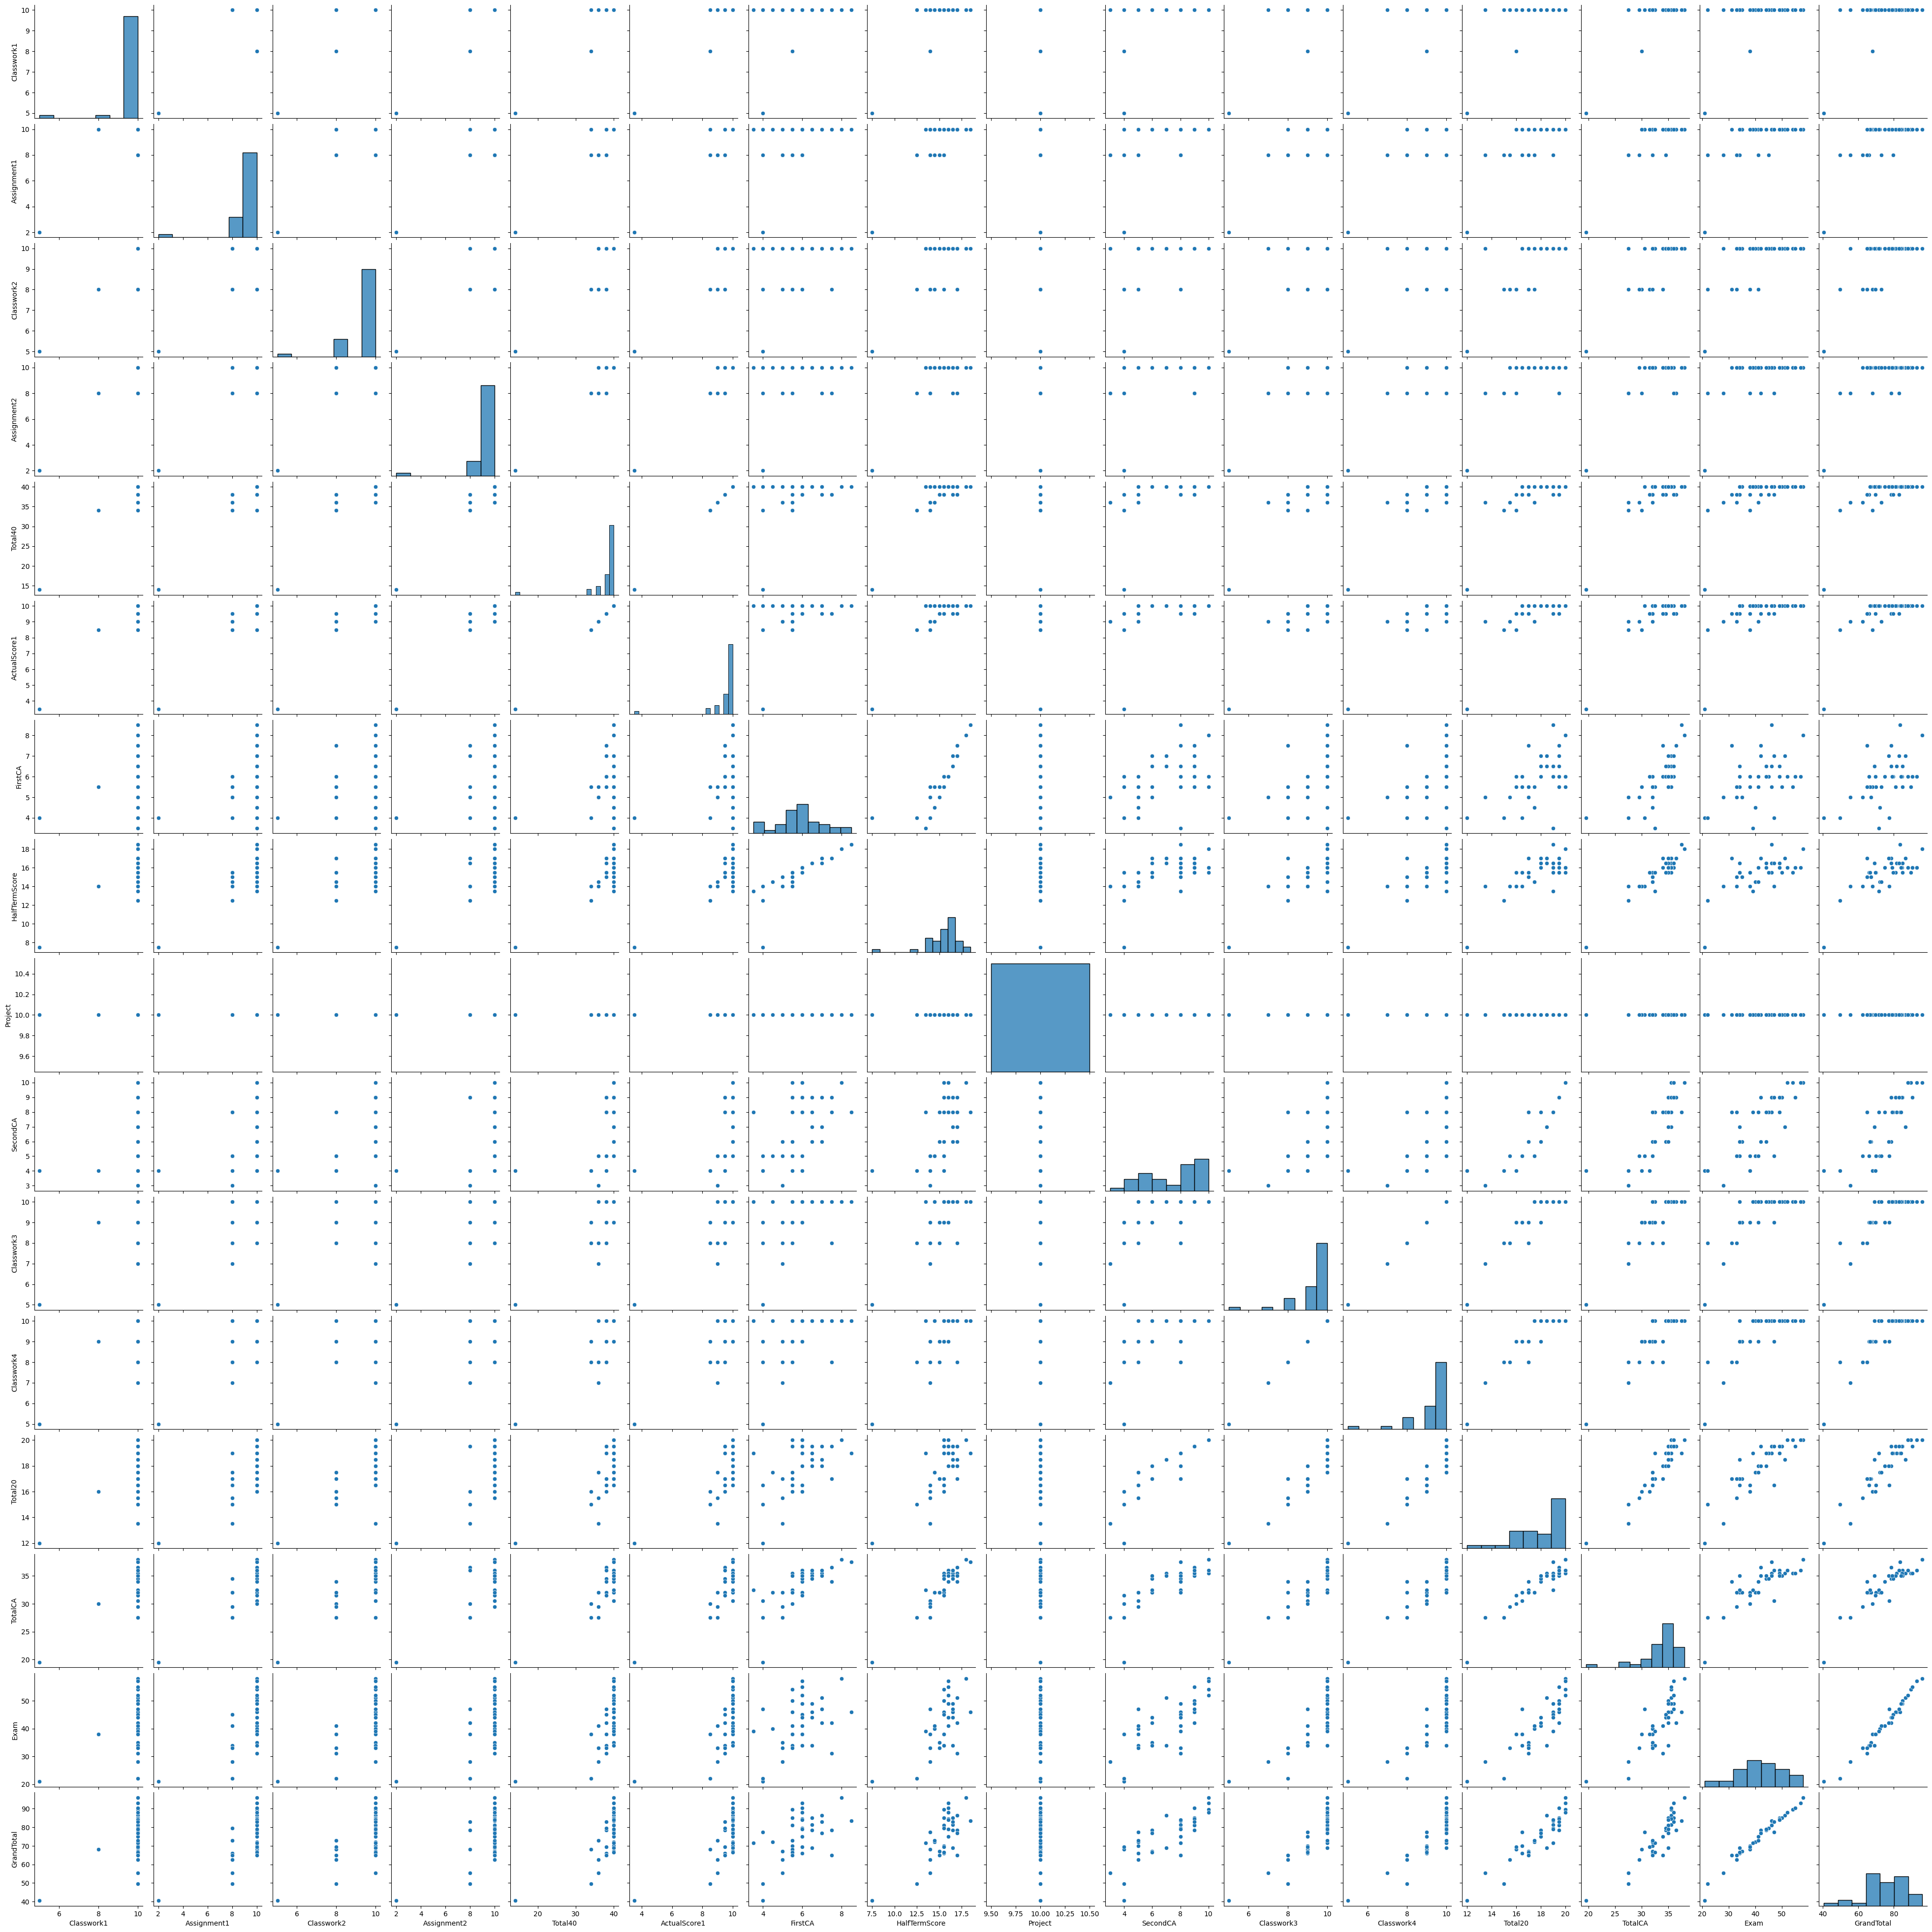

In [64]:
import seaborn as sns
sns.pairplot(df)


### Feature Engineering

In [65]:
df['ActualScore'] = df['Classwork1'] + df['Assignment1'] + df['Classwork2'] + df['Assignment2']


### Normalize/Standardize Data:

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Classwork1', 'Assignment1', 'Classwork2', 'Assignment2']] = scaler.fit_transform(df[['Classwork1', 'Assignment1', 'Classwork2', 'Assignment2']])


### Split into Training and Testing Sets:

Divide your data into training and testing sets.

In [67]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Grade'])
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Choosing a Model
Select a Model:

Choose a model based on your problem type (regression or classification).

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [69]:
# Map grades to numerical values
grade_mapping = {
    'A1': 1, 'B2': 2, 'B3': 3, 'C4': 4, 'C5': 5, 'C6': 6,
    'D7': 7, 'E8': 8, 'F9': 9
}
df['Grade'] = df['Grade'].map(grade_mapping)

### Train the Model:

Fit the model to your training data.

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop the 'Names' column from the features
X = df.drop(columns=['Names'])
y = df['Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.830403819145629e-30
Mean Squared Error: 1.830403819145629e-30


### Model Evaluation:

Cross-Validation: Use cross-validation to ensure your model's performance is consistent across different subsets of the data.

In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation Scores: {-scores}')
print(f'Mean Cross-Validation Score: {-scores.mean()}')


Cross-Validation Scores: [1.97215226e-31 2.89659864e-31 7.55052581e-30 2.16936749e-30
 1.07059694e-30]
Mean Cross-Validation Score: 2.255473065842844e-30


### Feature Importance:

Analyze Feature Importance: Understand which features are most important for your model's predictions.

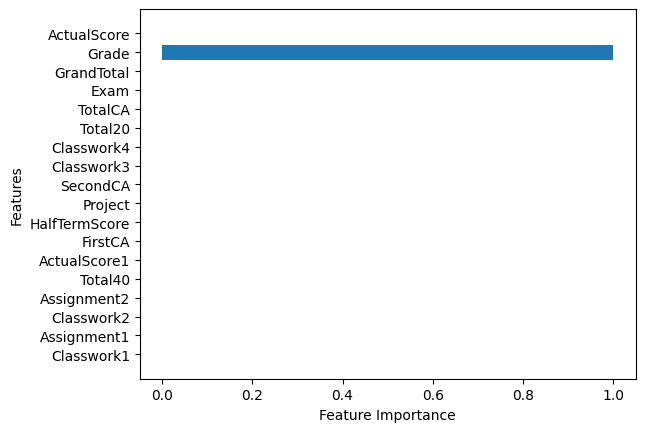

In [72]:
import matplotlib.pyplot as plt
feature_importance = model.coef_
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


### Model Tuning:

Hyperparameter Tuning: Fine-tune your model's hyperparameters to potentially improve performance.

In [73]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Initialize GridSearchCV with the correct parameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'copy_X': True, 'fit_intercept': False, 'positive': True}


### Model Deployment:

Save the Model: Save your trained model for future use.

In [74]:
import joblib
joblib.dump(model, 'student_grade_predictor.pkl')


['student_grade_predictor.pkl']

In [75]:
#%pip install streamlit
